# ZTF Lightcurve

I think the ZTF portal could not extract the HAT-P-67A lightcurve?  Maybe it's too bright?

This target might be HAT-P-67B?  Hard to tell from the ZTF portal, let's look.

In [1]:
%config Completer.use_jedi = False

In [2]:
import lightkurve as lk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

## Read in the ASAS-SN data

In [4]:
! head ../../data/ZTF/hatp67_ZTF.tbl

\fixlen = T
\RowsRetrieved = 1043
\ hjd (d)
\ mjd (d)
\ mag (mag)
\ magerr (mag)
\ ra (deg)
\ dec (deg)
\ limitmag (mag)
\ magzp (mag)


In [5]:
from astropy.table import Table

In [8]:
tab = Table.read('../../data/ZTF/hatp67_ZTF.tbl', format='ascii.ipac')

In [9]:
df = tab.to_pandas()

In [49]:
df.catflags.value_counts()

0        973
32768     69
65535      1
Name: catflags, dtype: int64

In [ ]:
lc

In [12]:
df['flux'] = 10**(-df.mag/2.5)

In [13]:
df['BTJD'] = df['hjd'] - 2457000.0

In [50]:
lc = lk.LightCurve(time=df['BTJD'].values, flux=df['flux'].values).normalize()

(0.0, 2.0)

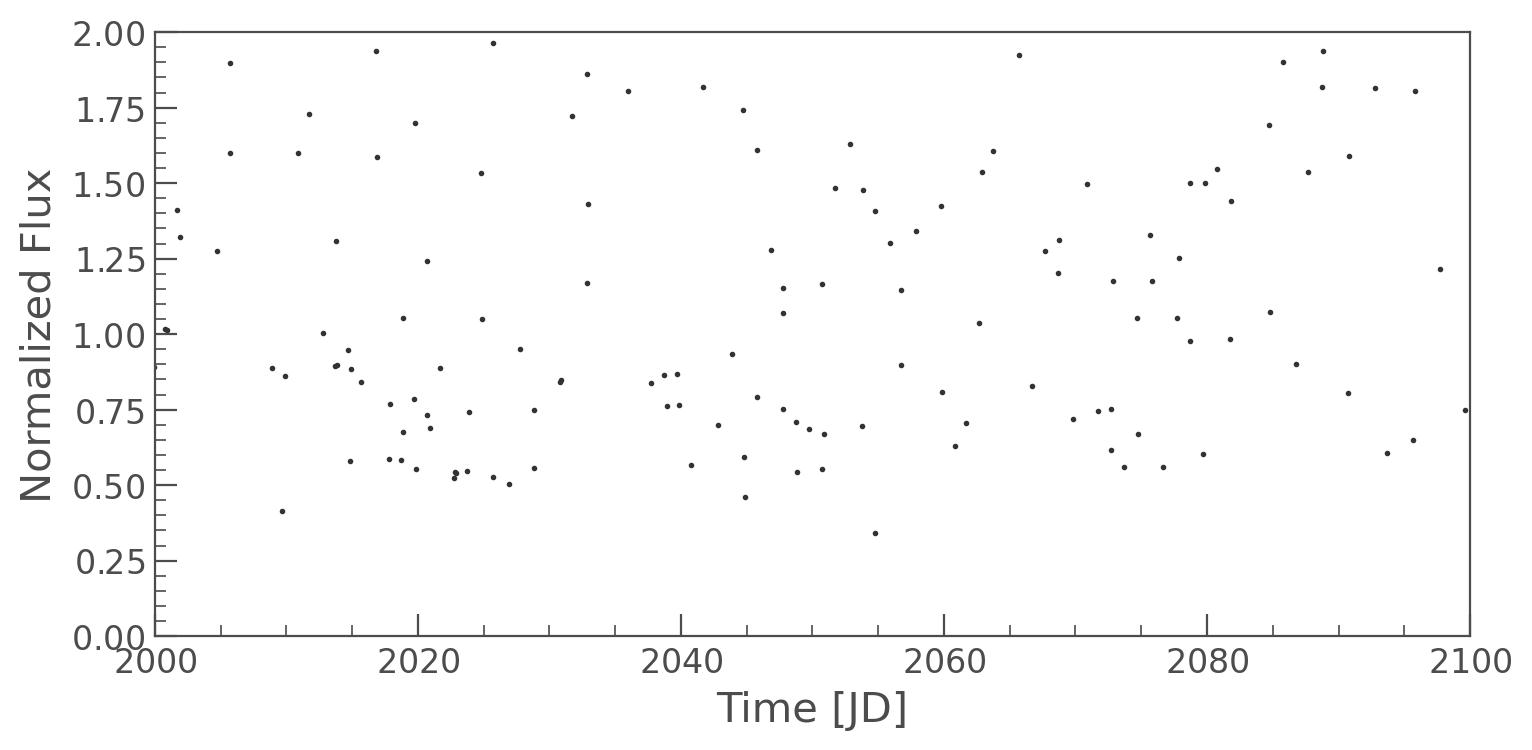

In [53]:
ax = lc.normalize().scatter()
ax.set_xlim(2000, 2100)
ax.set_ylim(0, 2)

In [28]:
import astropy.units as u

In [42]:
pg = lc.to_periodogram(minimum_period=4.0*u.day, maximum_period=6.3*u.day, oversample_factor=10)

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux'>

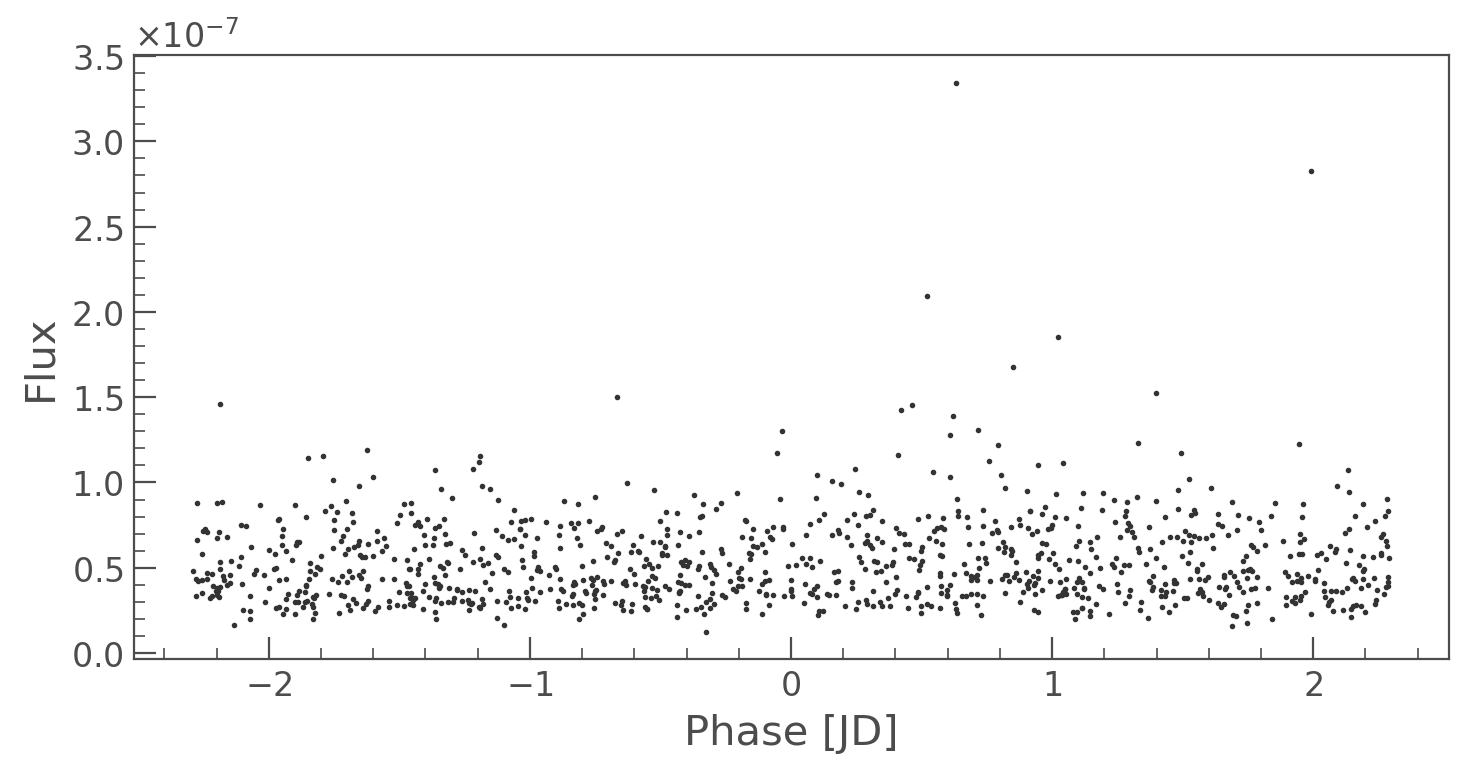

In [43]:
lc.fold(pg.period_at_max_power).scatter()

In [ ]:
ls.

<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='Power'>

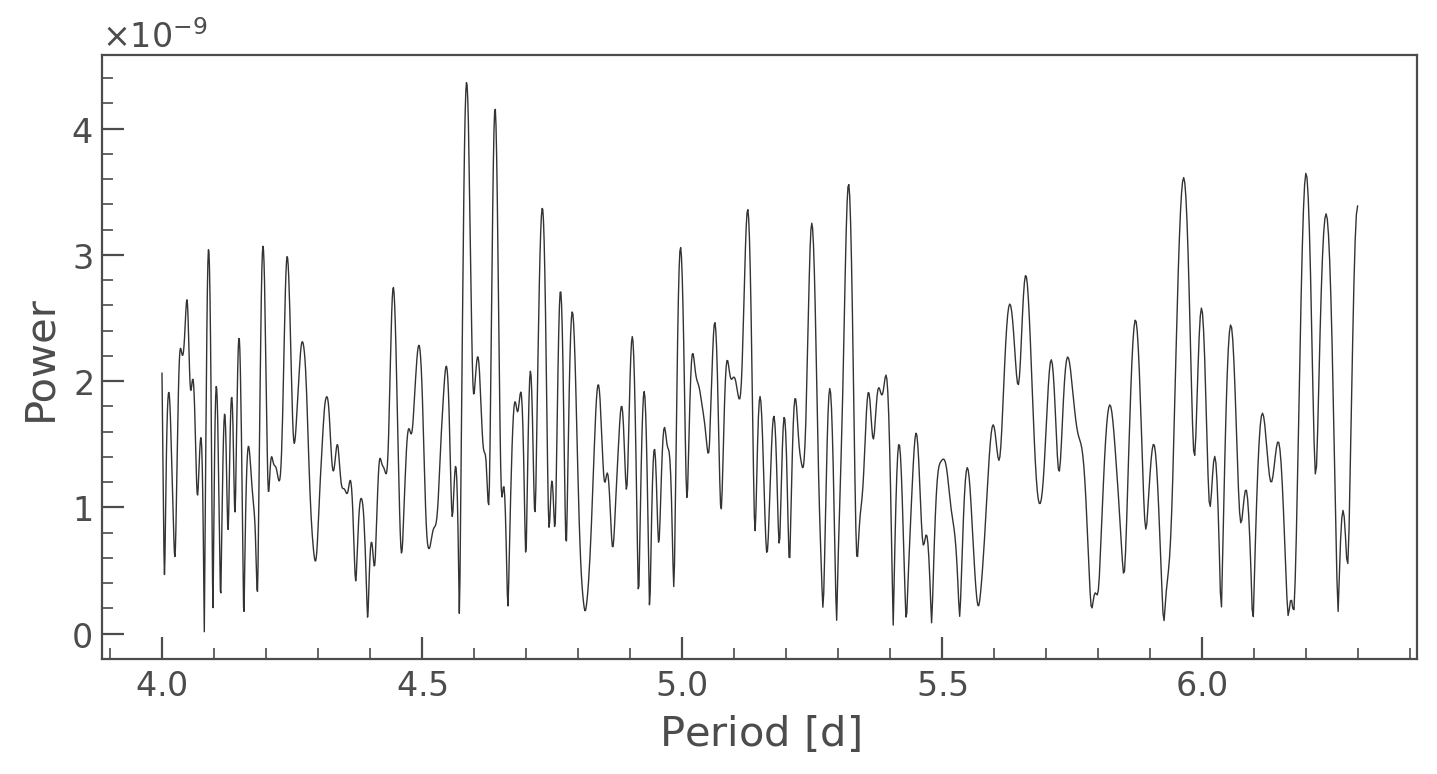

In [44]:
pg.plot()

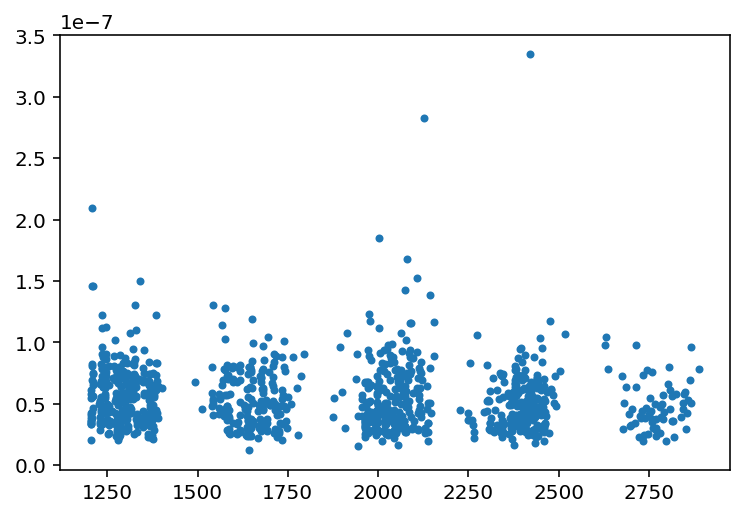

In [15]:
plt.plot(df.BTJD, df['flux'], '.')

In [11]:
df.iloc[0]

oid            762101300021567
expid                 44941226
hjd             2458203.913578
mjd               58203.412268
mag                  18.426117
magerr                0.032106
catflags                     0
filtercode                  zg
ra                  256.609302
dec                  44.779353
chi                      1.853
sharp                   -0.009
filefracday     20180326412234
field                      762
ccdid                        1
qid                          3
limitmag             21.200001
magzp                26.191023
magzprms              0.028947
clrcoeff             -0.063588
clrcounc               0.00001
exptime                   30.0
airmass                  1.179
programid                    2
Name: 0, dtype: object

In [7]:
df['BTJD'] = df.HJD - 2457000.0

In [8]:
sentinel_value = 99.990
bad_data = df['flux(mJy)'] == sentinel_value

In [9]:
df = df[~bad_data]

In [10]:
df_V = df[df.Filter == 'V'].reset_index(drop=True)
df_g = df[df.Filter == 'g'].reset_index(drop=True)

In [11]:
scalar_constant = np.nanmedian(df_V['flux(mJy)'])
df_V['flux'] = df_V['flux(mJy)']/scalar_constant
df_V['flux_err'] = df_V.flux_err/scalar_constant

In [12]:
scalar_constant = np.nanmedian(df_g['flux(mJy)'])
df_g['flux'] = df_g['flux(mJy)']/scalar_constant
df_g['flux_err'] = df_g.flux_err/scalar_constant

In [13]:
df_g.Camera.value_counts()

bC    1044
bs     807
bt       3
Name: Camera, dtype: int64

In [20]:
mask2 = df_g.flux < 0.73

In [14]:
# Read in the TESS Lightcurve too

In [26]:
sr = lk.search_lightcurve('HAT-P-67', author='SPOC')

In [27]:
sr

SearchResult containing 5 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 24 2020   SPOC     120   198588220      0.0
  1 TESS Sector 26 2020   SPOC     120   198588220      0.0
  2 TESS Sector 51 2022   SPOC     120   198588220      0.0
  3 TESS Sector 52 2022   SPOC     120   198588220      0.0
  4 TESS Sector 53 2022   SPOC     120   198588220      0.0

In [28]:
lcs = sr.download_all()
lc = lcs.stitch().normalize()

(2680.0, 2775.0)

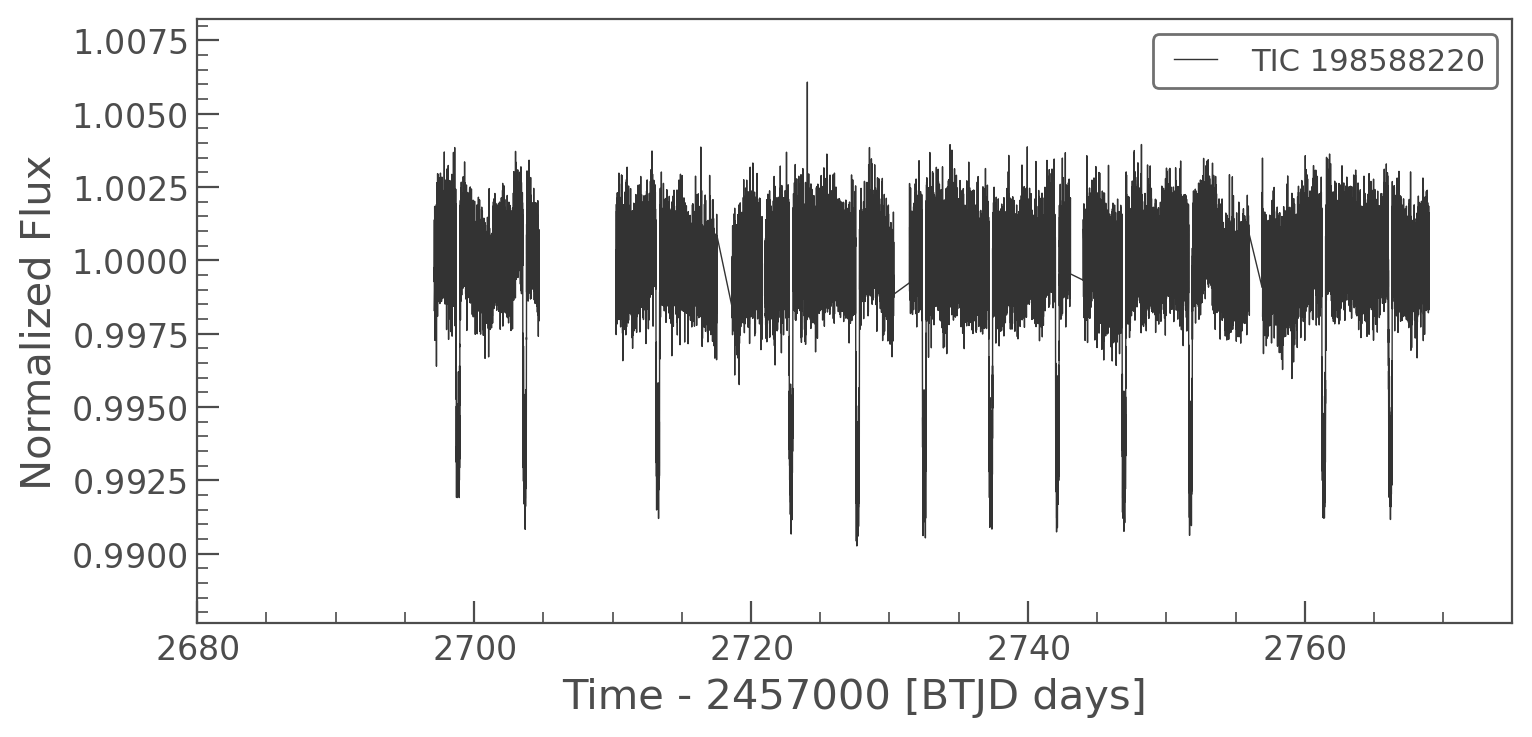

In [30]:
ax = lc.plot()
ax.set_xlim(2680, 2775)

Text(0, 0.5, 'Flux')

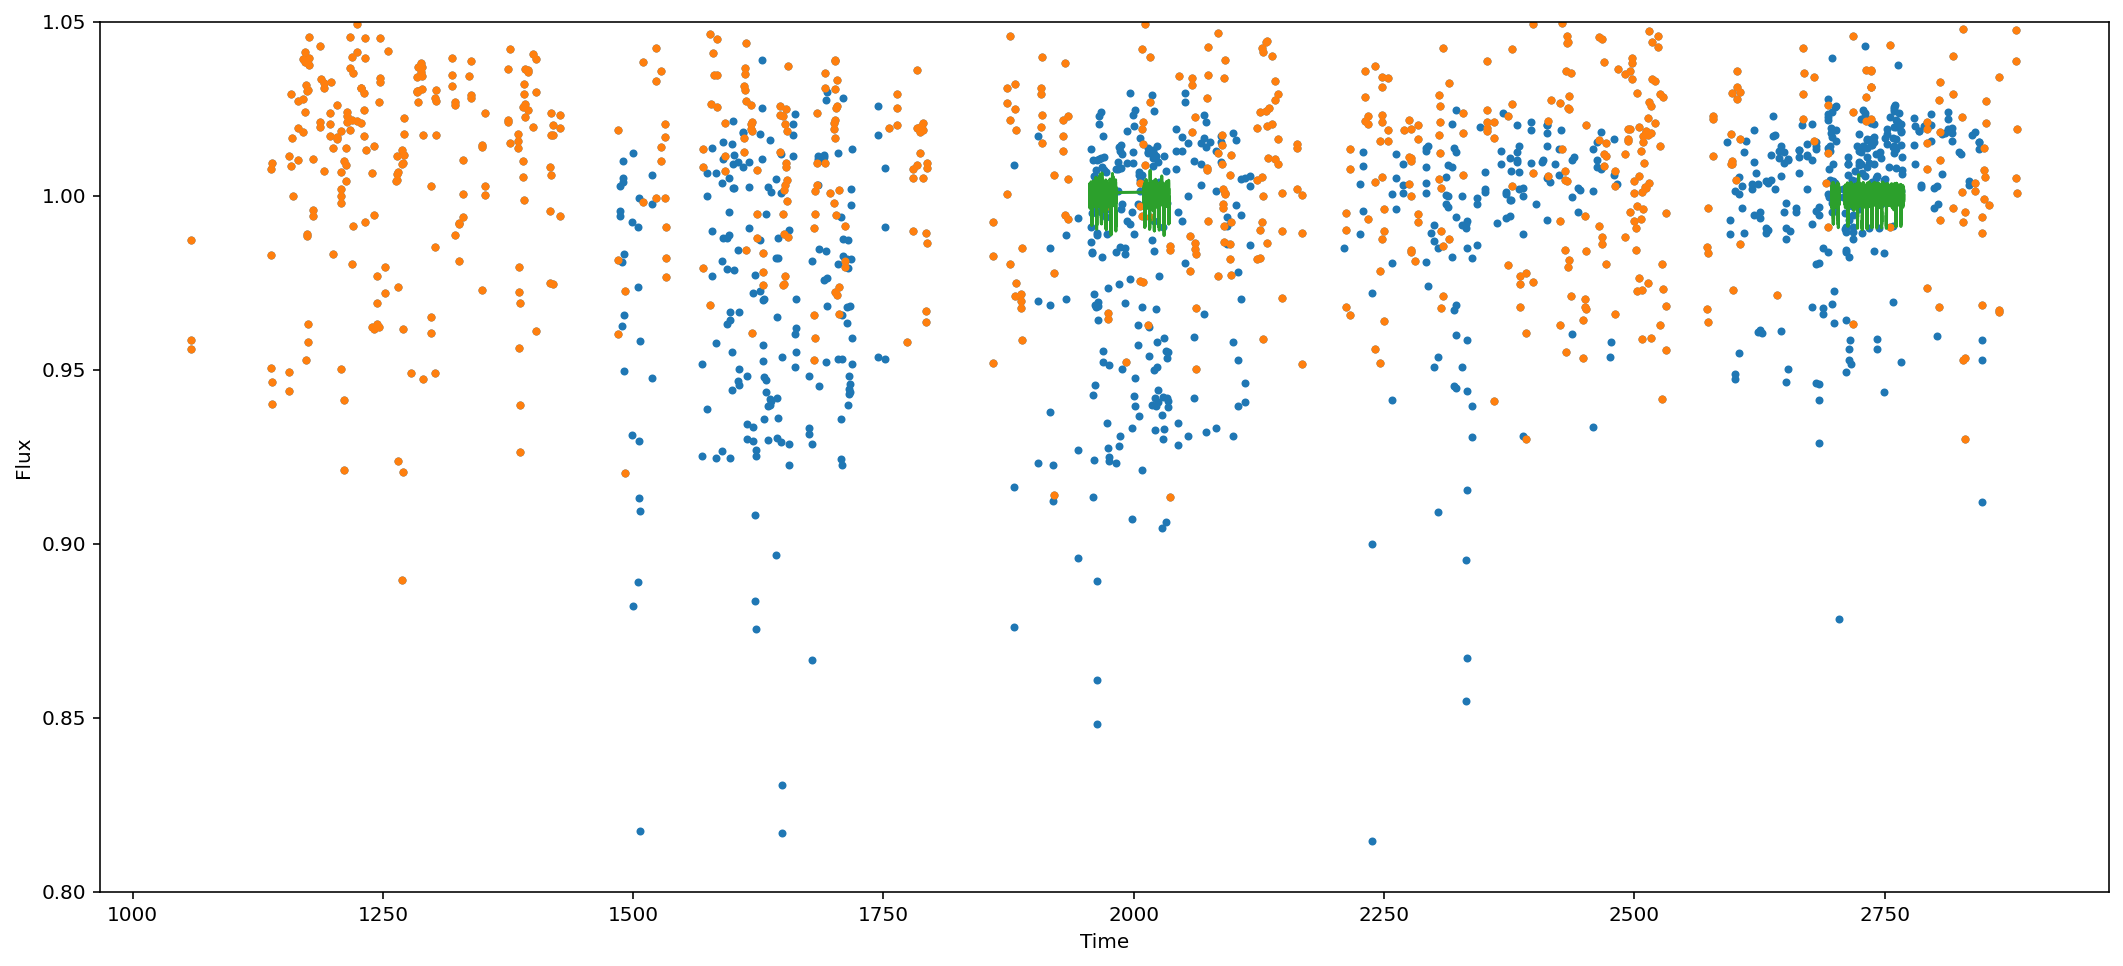

In [31]:
plt.figure(figsize=(18, 8))
plt.plot(df_g['BTJD'], df_g['flux'], '.');
mask = df_g.Camera == 'bs'
plt.plot(df_g['BTJD'][mask], df_g['flux'][mask], '.');

plt.plot(lc.time.value, lc.flux)

#plt.plot(df_V['BTJD'], df_V['flux'], 'o');

#plt.xlim(1900, 2050)
plt.ylim(0.8, 1.05)
plt.xlabel('Time')
plt.ylabel('Flux')
#plt.xlim(2200)

Text(0, 0.5, 'Flux')

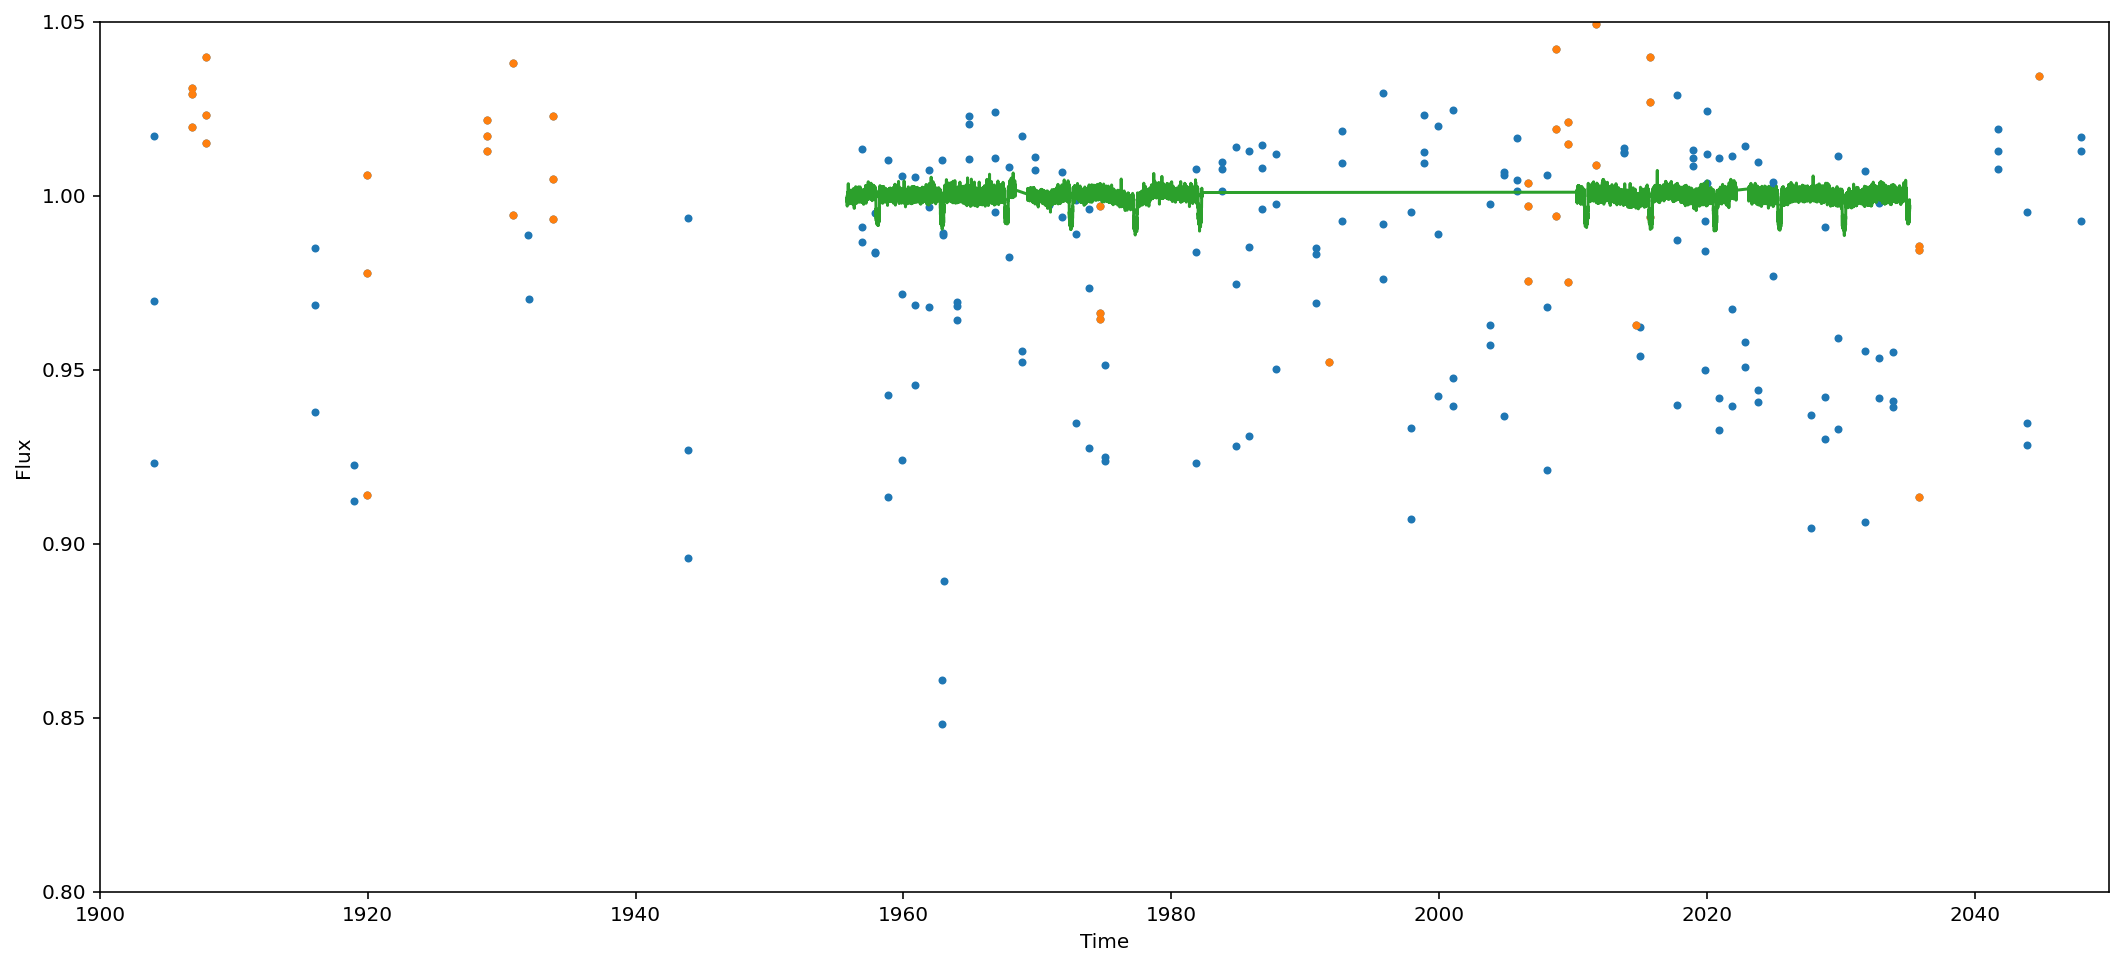

In [32]:
plt.figure(figsize=(18, 8))
plt.plot(df_g['BTJD'], df_g['flux'], '.');
mask = df_g.Camera == 'bs'
plt.plot(df_g['BTJD'][mask], df_g['flux'][mask], '.');

plt.plot(lc.time.value, lc.flux)

#plt.plot(df_V['BTJD'], df_V['flux'], 'o');

plt.xlim(1900, 2050)
plt.ylim(0.8, 1.05)
plt.xlabel('Time')
plt.ylabel('Flux')
#plt.xlim(2200)

(2720.0, 2750.0)

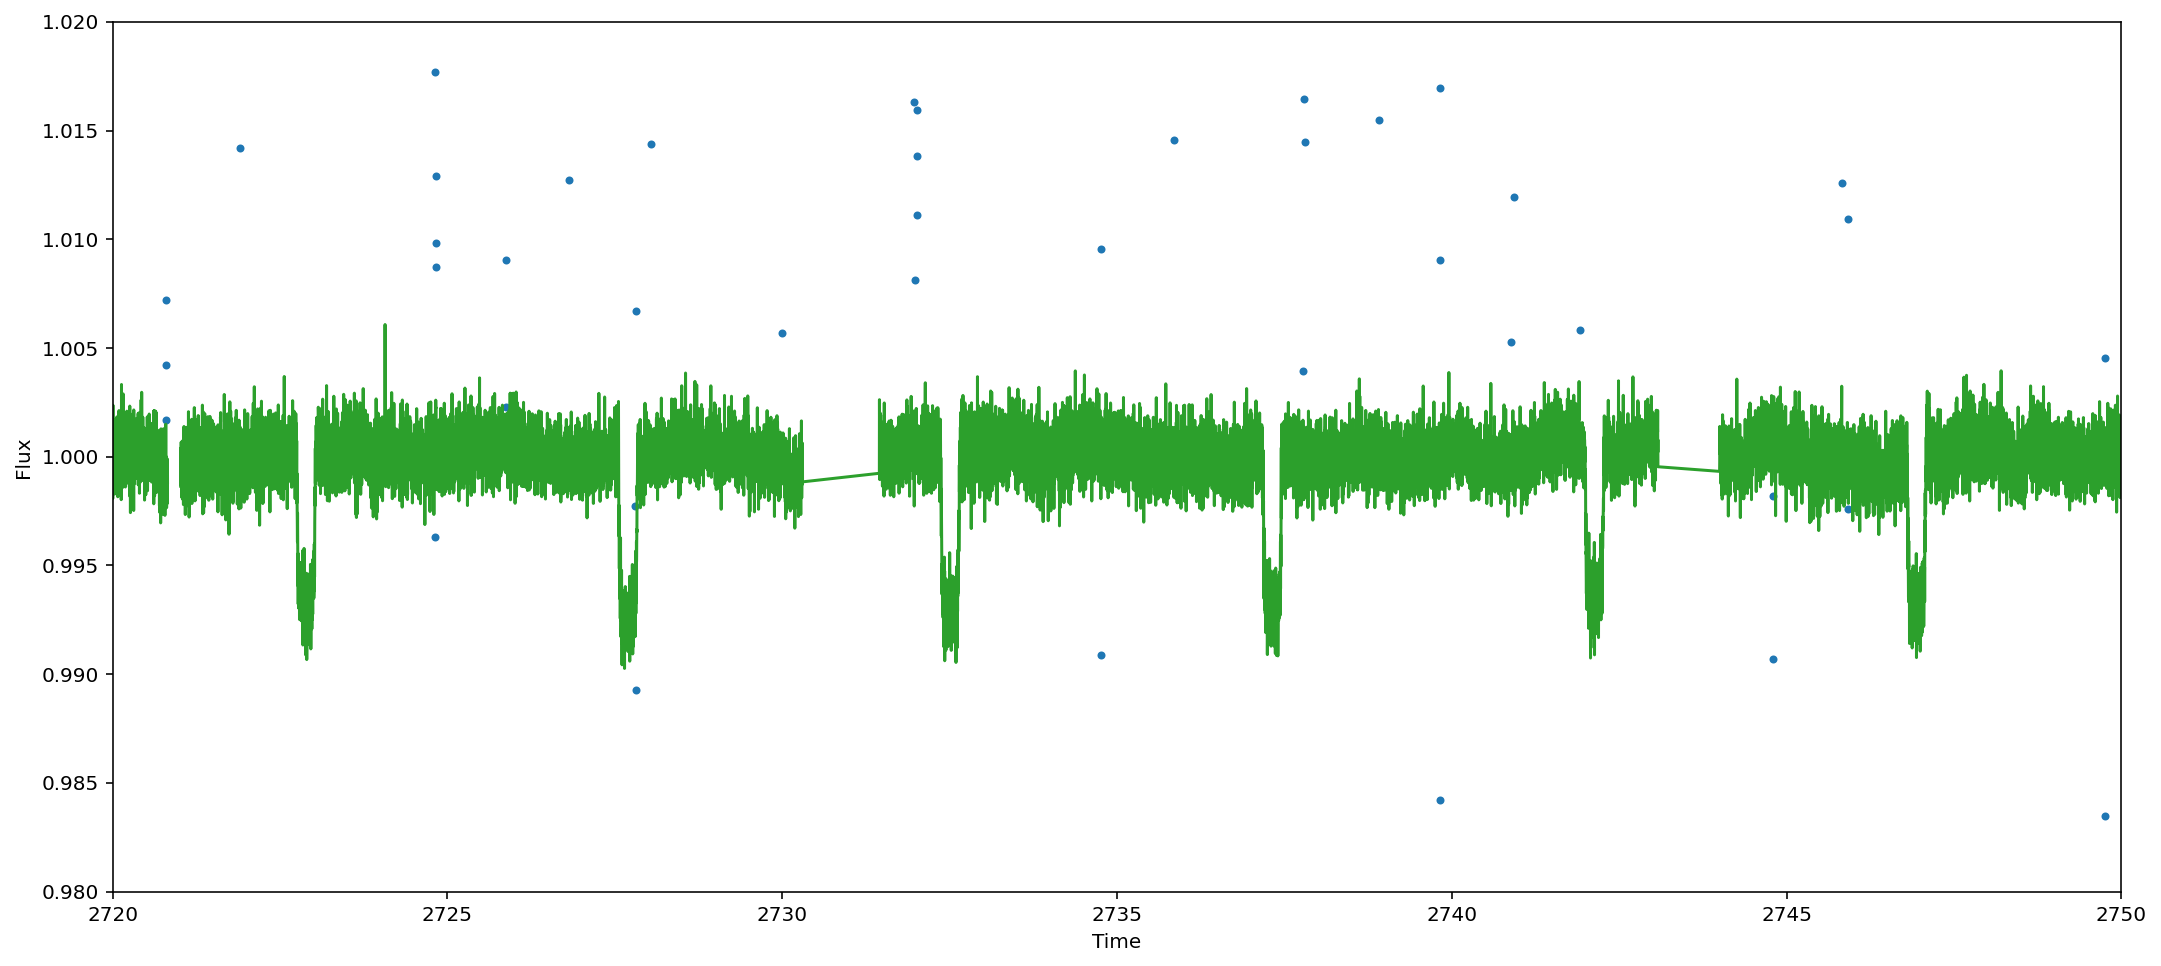

In [37]:
plt.figure(figsize=(18, 8))
plt.plot(df_g['BTJD'], df_g['flux'], '.');
mask = df_g.Camera == 'bs'
plt.plot(df_g['BTJD'][mask], df_g['flux'][mask], '.');

plt.plot(lc.time.value, lc.flux)

#plt.plot(df_V['BTJD'], df_V['flux'], 'o');

plt.xlim(1900, 2050)
plt.ylim(0.98, 1.02)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.xlim(2720, 2750)

In [39]:
df_V['flux_err'] += 0.01

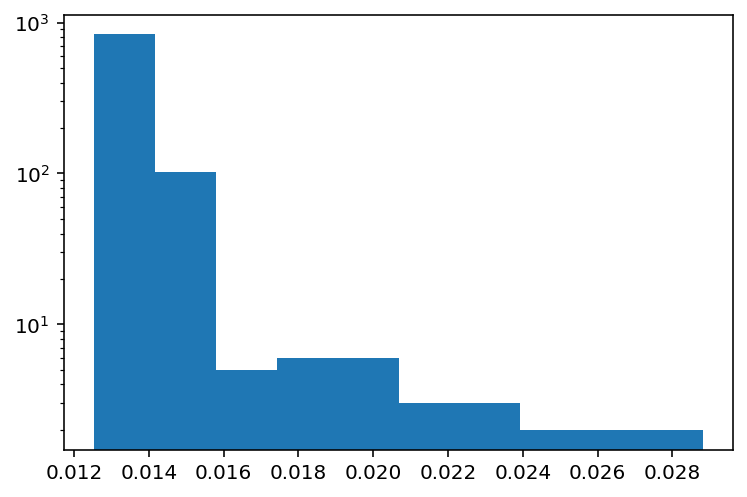

In [40]:
plt.hist(df_V.flux_err)
plt.yscale('log')

## Make an ASASSN Periodogram

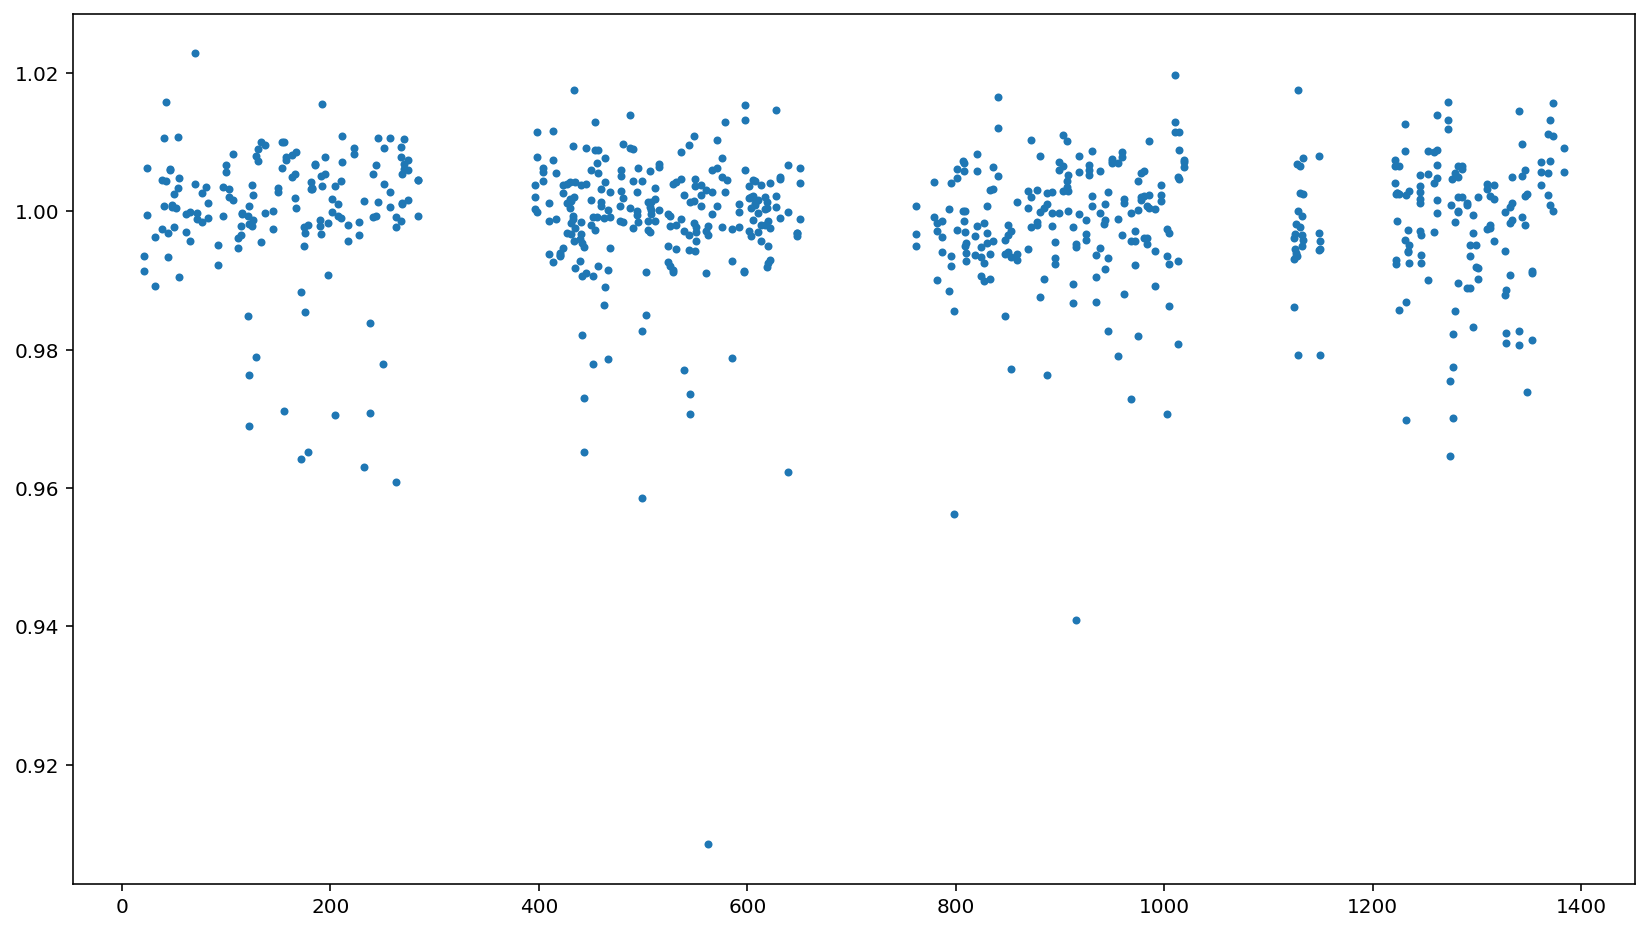

In [41]:
df_V = df_V[df_V.BTJD > 0] 

plt.figure(figsize=(14, 8))
plt.plot(df_V.BTJD, df_V.flux, '.')

In [66]:
lc_asassn = lk.LightCurve(time=df_V.BTJD.values, 
                          flux=df_V.flux.values, 
                          flux_err=df_V.flux_err.values)

In [67]:
import astropy.units as u

In [114]:
pg = lc_asassn.to_periodogram(minimum_period=2.1*u.day, maximum_period=40.3*u.day, 
                              oversample_factor=20.0, ls_method='slow', nterms=4)

In [115]:
pg.period_at_max_power

<Quantity 29.54983526 d>

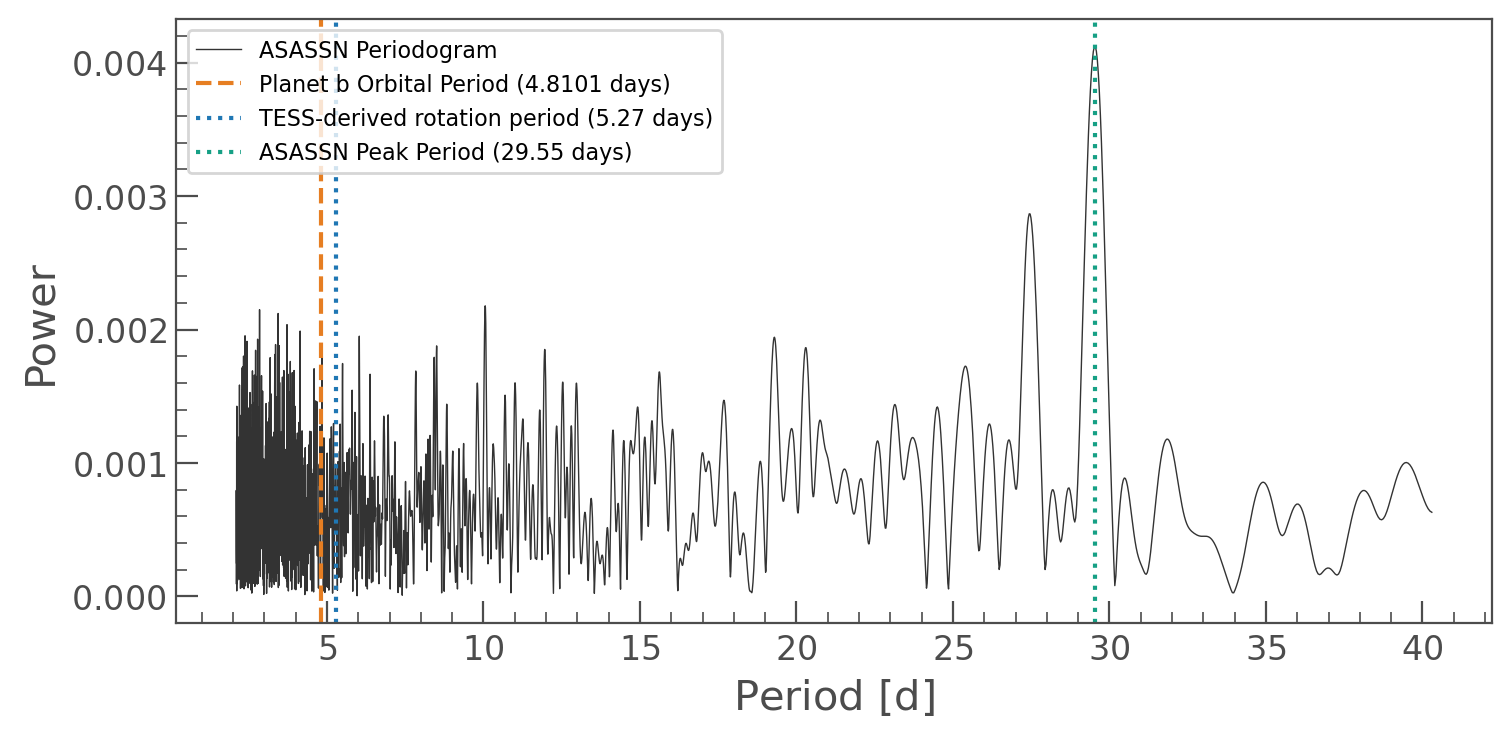

In [120]:
ax = pg.plot(label='ASASSN Periodogram')
ax.axvline(4.8101, linestyle='dashed', 
           label='Planet b Orbital Period (4.8101 days)', color='#e67e22')
ax.axvline(5.27483, linestyle='dotted', 
           label='TESS-derived rotation period (5.27 days)')
ax.axvline(pg.period_at_max_power.value, linestyle='dotted', 
           label='ASASSN Peak Period (29.55 days)', color='#16a085')

ax.legend(fontsize=8)

In [110]:
btjd_T0 = 2455961.38467 - 2457000.0

In [111]:
pg.model(lc_asassn.time).fold(pg.period_at_max_power)

<FoldedLightCurve length=742 LABEL="LS Model">
        time               flux        flux_err   time_original   
                                                                  
     TimeDelta           float64       float64         Time       
------------------- ------------------ -------- ------------------
-14.597609087064297 1.0004825358232192      nan 479.07362999999896
                ...                ...      ...                ...
 14.702922728219212 1.0002835822121963      nan  153.9995900001377

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

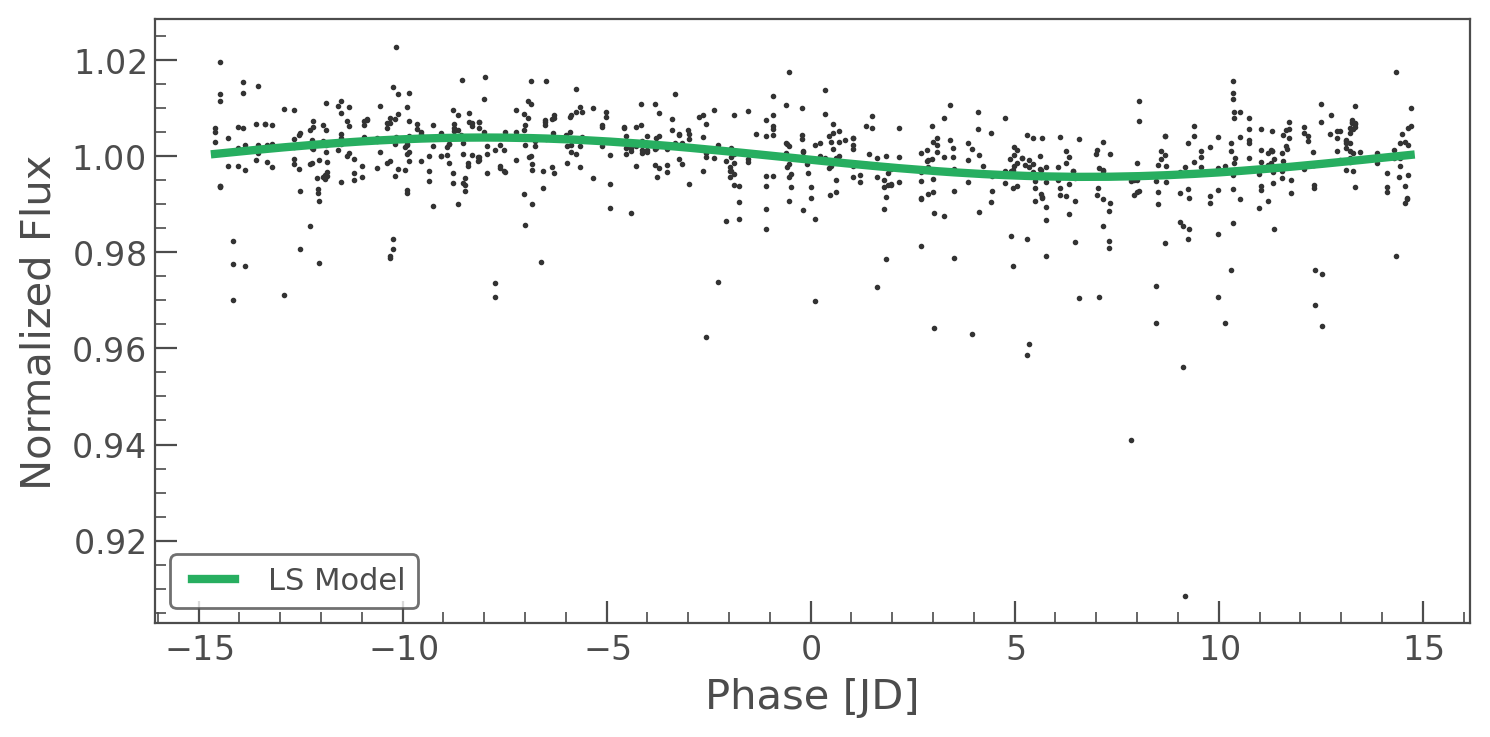

In [112]:
ax = lc_asassn.fold(pg.period_at_max_power).scatter()
pg.model(lc_asassn.time).fold(pg.period_at_max_power).plot(ax=ax, color='#27ae60', linewidth=3)

In [89]:
(-5.27**-1 + 4.8101**-1)**-1

27.55949880408785

In [4]:
sr = lk.search_lightcurve('HAT-P-67')

In [5]:
sr_2 = lk.search_targetpixelfile('HAT-P-67') #data cube: add up pixels in each picture

In [7]:
sr_3 = lk.search_tesscut('HAT-P-67') #data cube: add up pixels in each picture

In [10]:
sr_3

SearchResult containing 3 data products.

 #     mission     year  author exptime target_name distance
                                   s                 arcsec 
--- -------------- ---- ------- ------- ----------- --------
  0 TESS Sector 24 2020 TESScut    1426    HAT-P-67      0.0
  1 TESS Sector 25 2020 TESScut    1426    HAT-P-67      0.0
  2 TESS Sector 26 2020 TESScut    1426    HAT-P-67      0.0

In [11]:
tpf_raw = sr_2[0].download() #use interact()

In [16]:
lc_raw = sr[1].download().normalize()

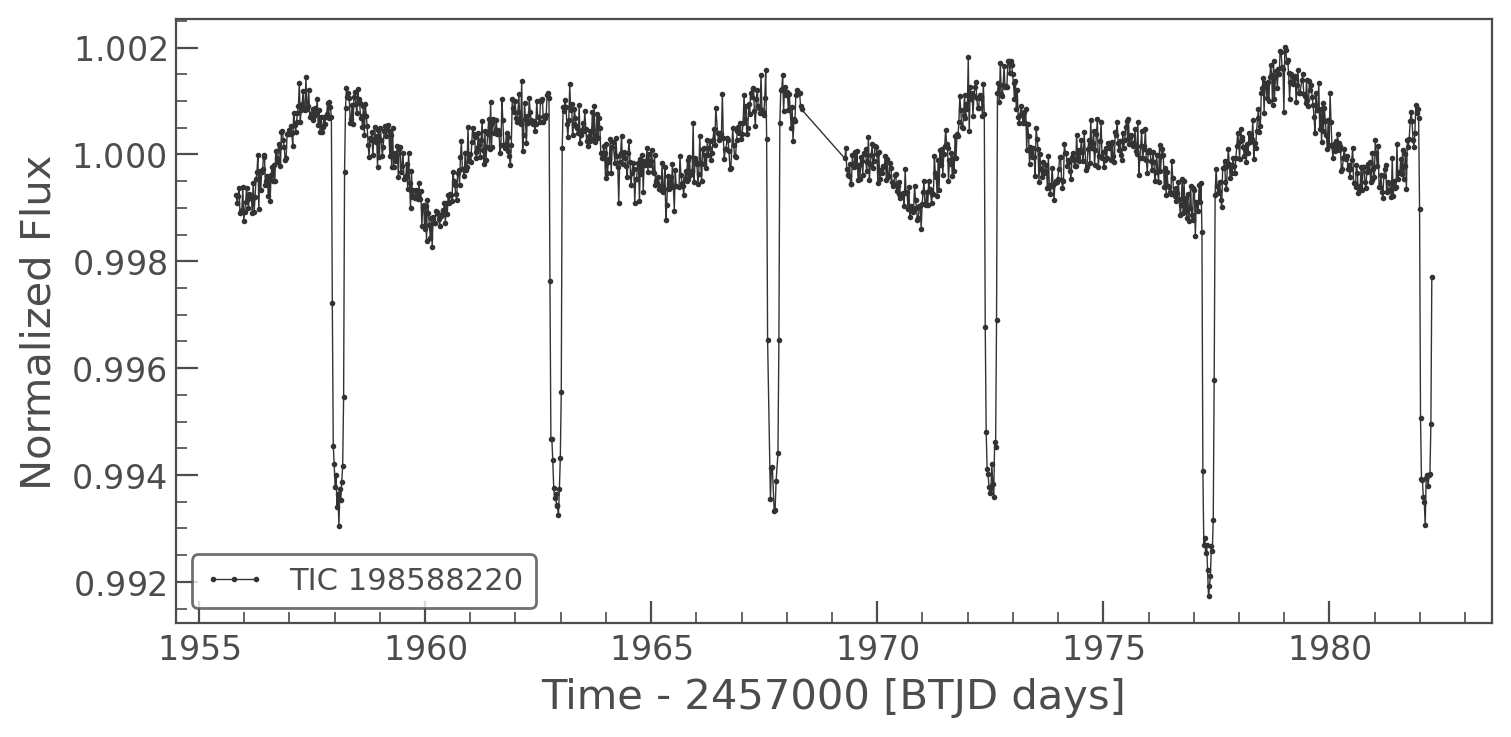

In [17]:
ax = lc_raw.plot(marker='.', linestyle=None)
#ax.set_ylim(0, 1.05)
plt.savefig('../../figures/HAT-P-67_TESS.png')

The star flux changes by about +/- 0.2%, and the exoplanet transit depth is about 0.7%.  We want to temporarily remove the star's variation so that we can isolate the exoplanet transit signal.

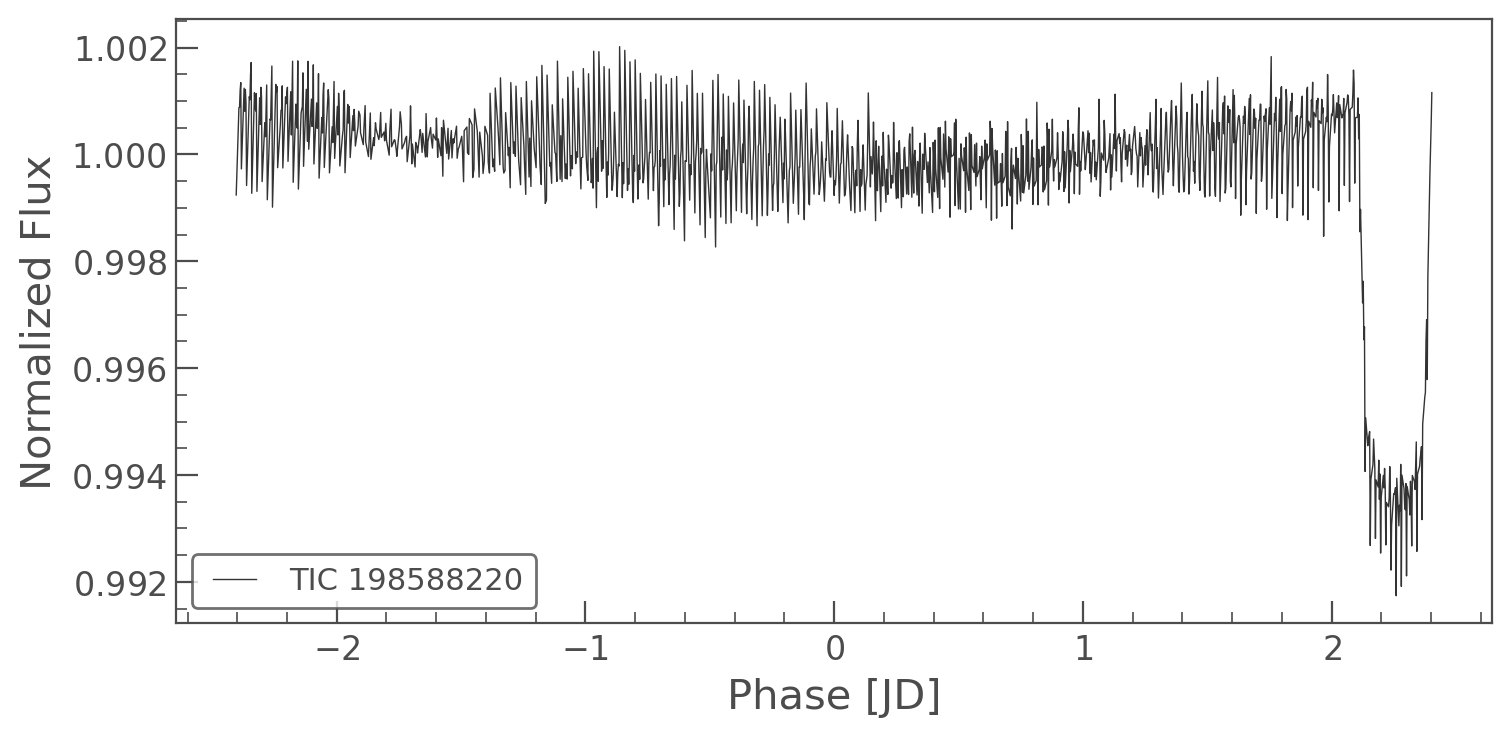

In [18]:
planet_period = 4.81010250
lc_raw.fold(period=planet_period).plot();

In [19]:
pg = lc_raw.to_periodogram()

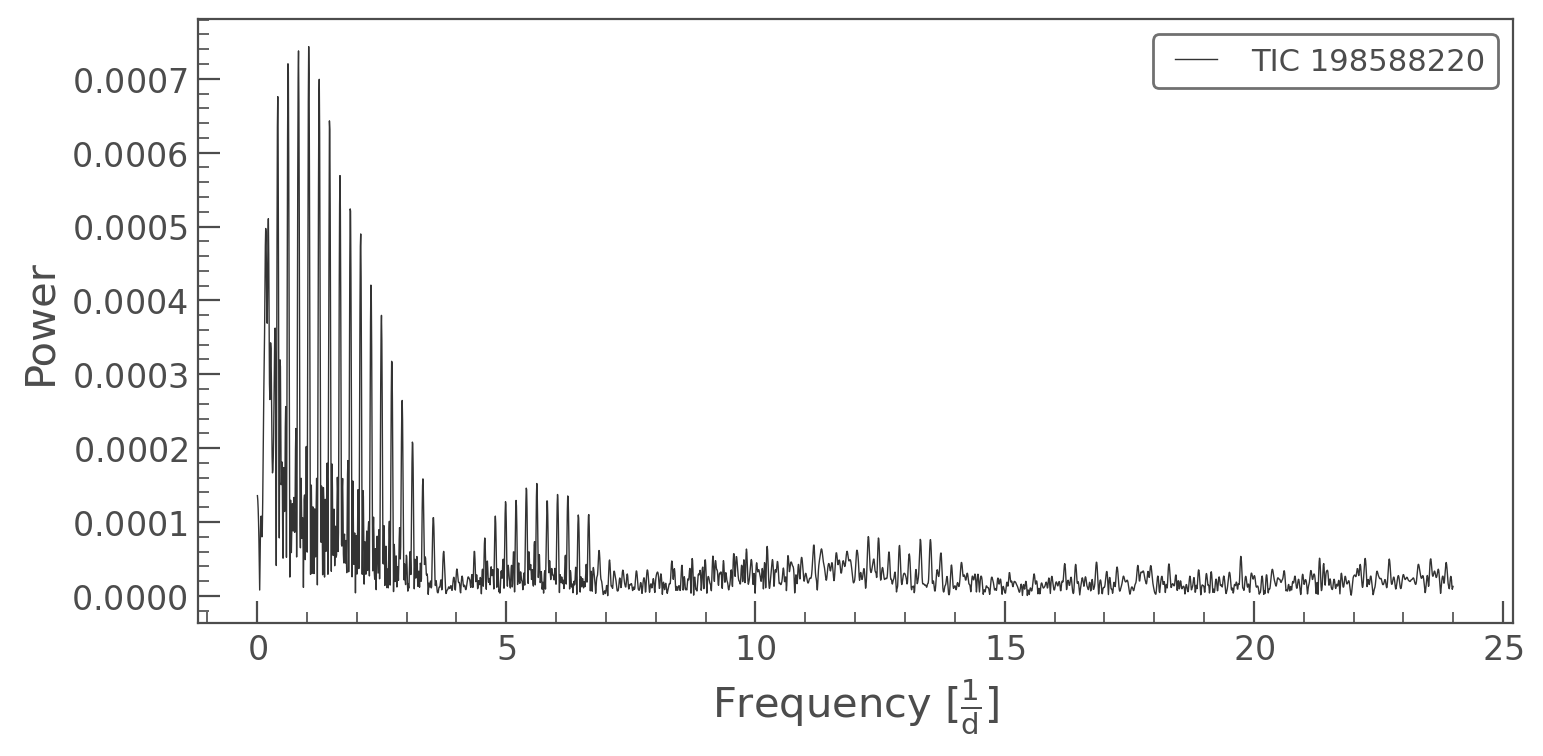

In [21]:
pg.plot();

In [22]:
period = pg.period_at_max_power
period

<Quantity 0.96488828 d>

In [23]:
orbital_period = 4.81010250
t_c = 2455961.38467
t_c_btjd = t_c-2457000.0

In [24]:
lc_folded = lc_raw.fold(period=orbital_period, epoch_time=t_c_btjd).normalize()

/home/gully/miniconda3/envs/disperse_env/lib/python3.8/site-packages/lightkurve/lightcurve.py:990: LightkurveWarning: The light curve already appears to be in relative units; `normalize()` will convert the light curve into relative units for a second time, which is probably not what you want.
  warnings.warn(


<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

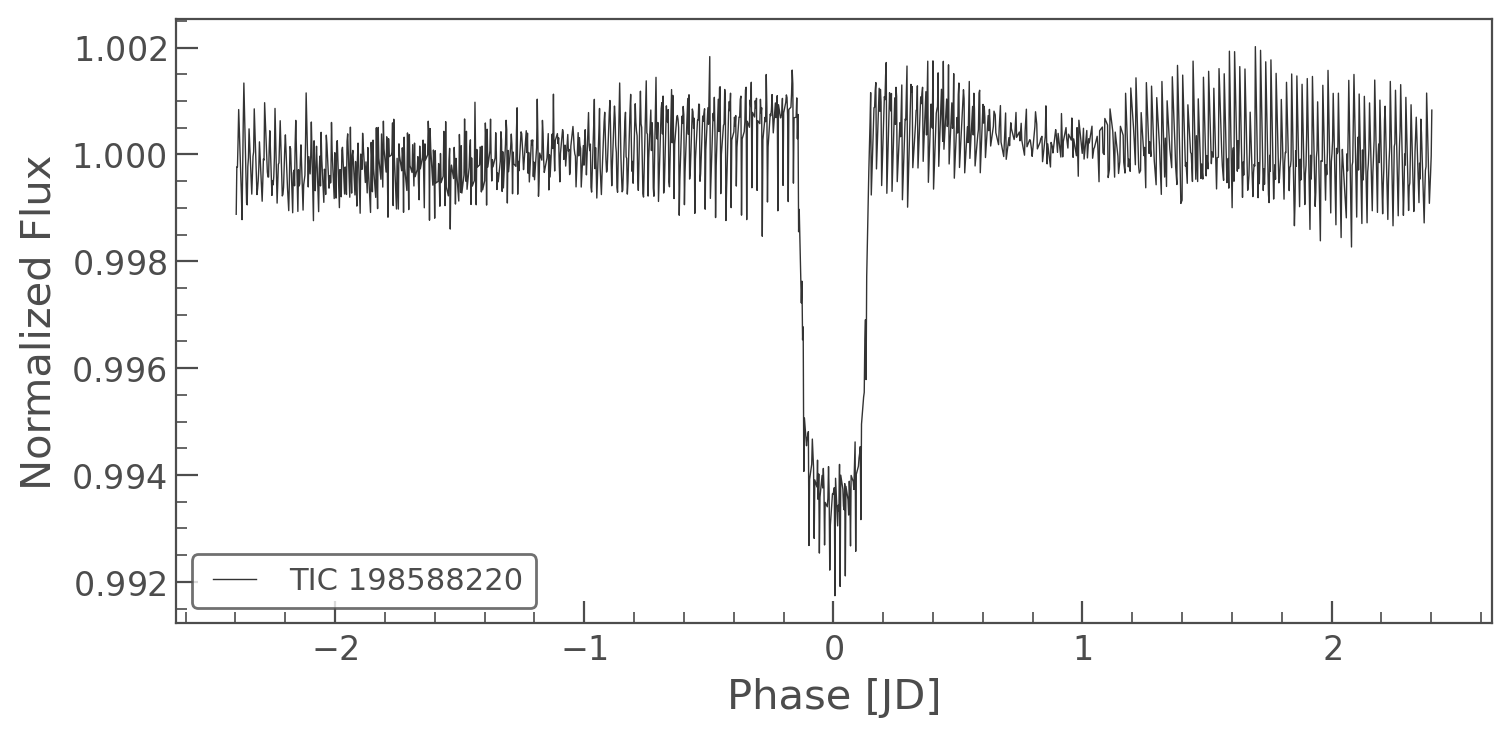

In [25]:
lc_folded.plot()

In [26]:
lc_raw2 = sr[0].download()

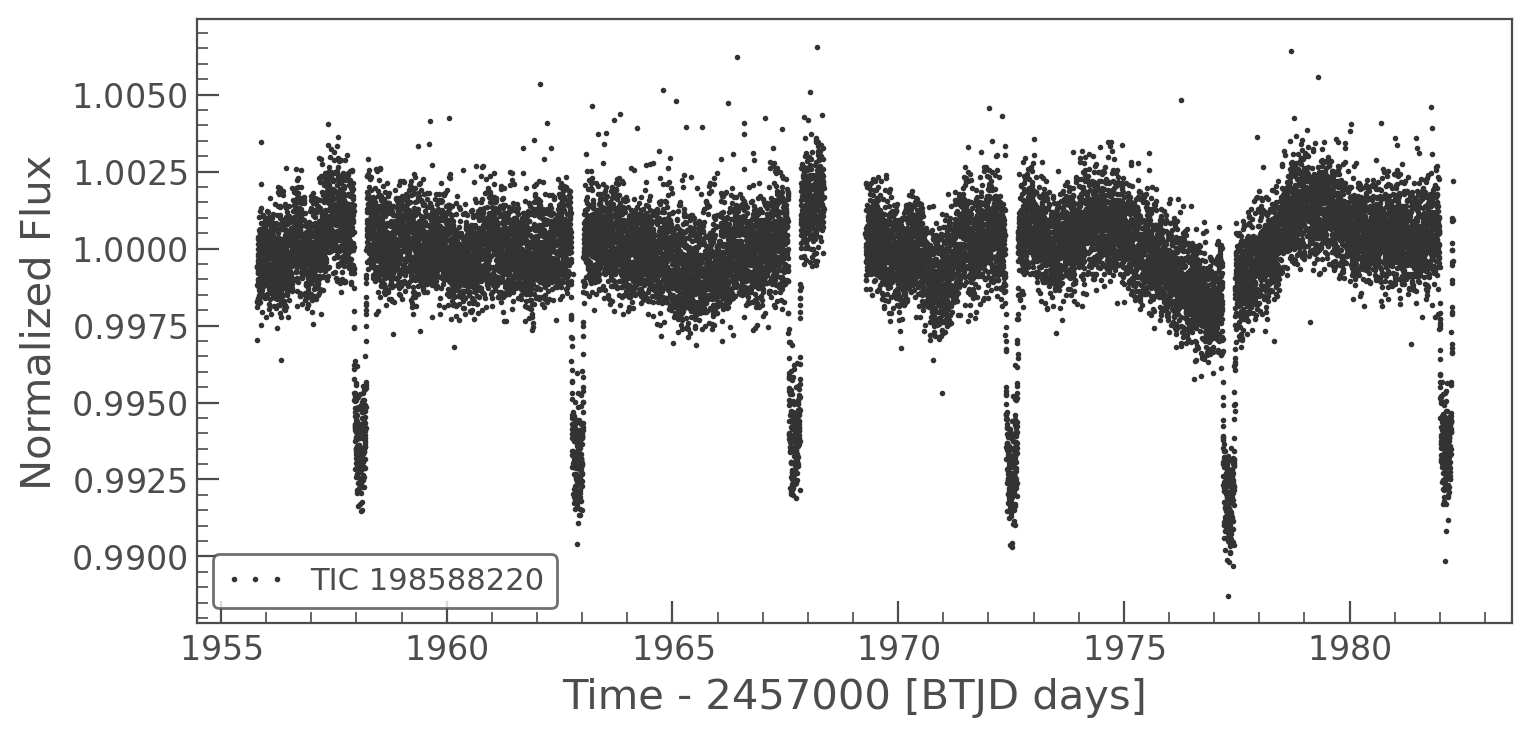

In [27]:
ax = lc_raw2.normalize().plot(marker='.', linestyle='none')
#ax.set_ylim(0, 1.05)

In [28]:
lc_flat = lc_raw2.flatten(window_length=1621)

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

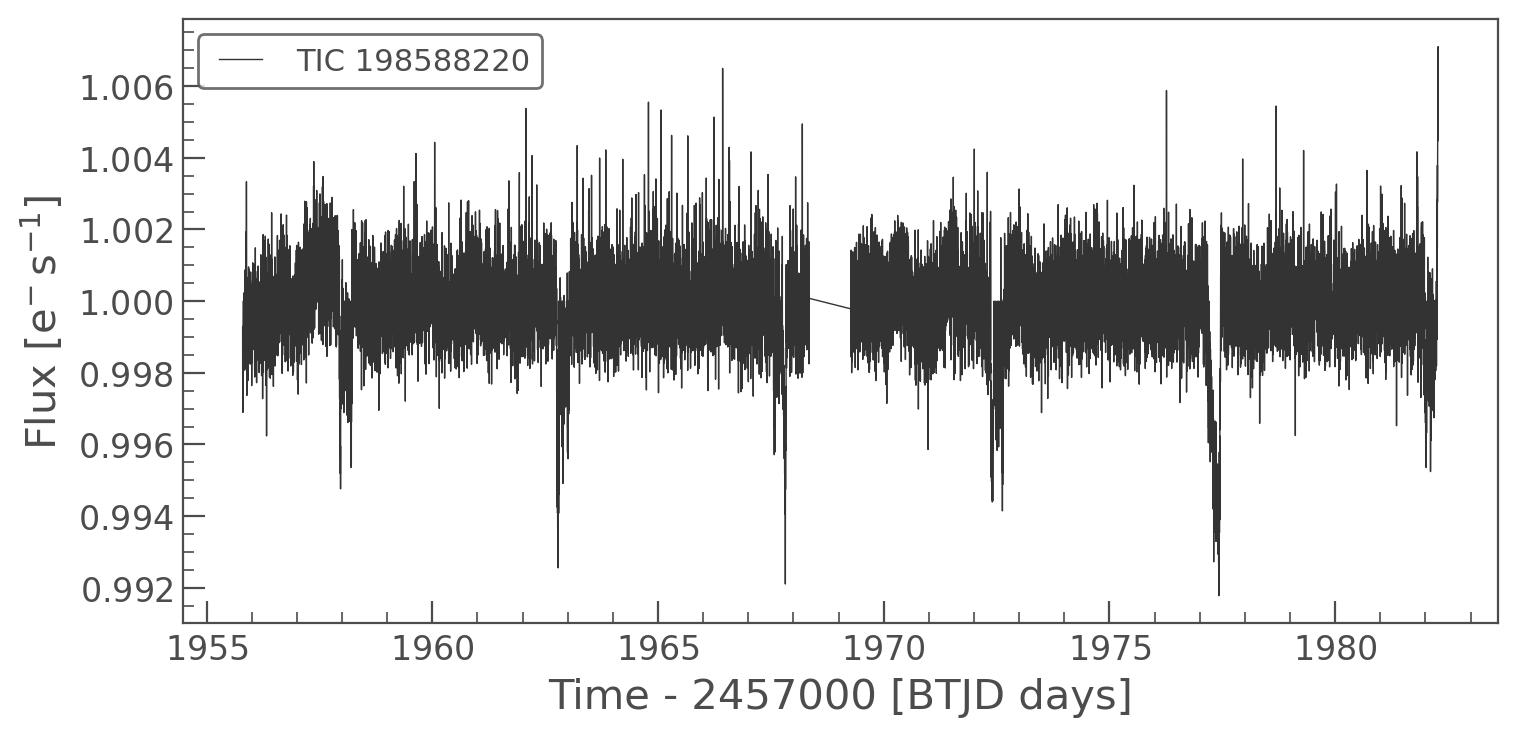

In [29]:
lc_flat.plot()

In [30]:
lc_folded2 = lc_raw2.fold(period=orbital_period, epoch_time=t_c_btjd).normalize()

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

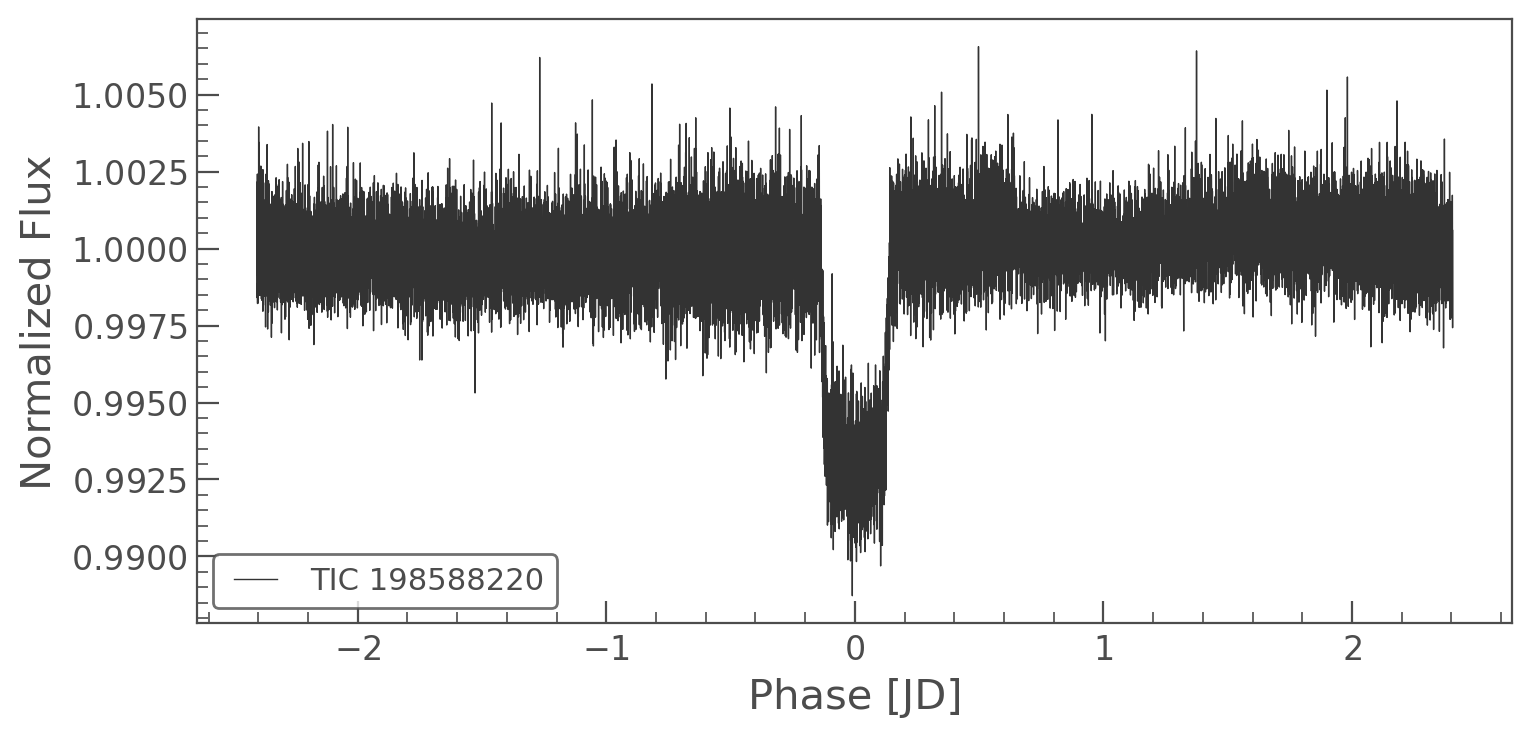

In [31]:
lc_folded2.plot()